In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
data = pd.read_csv('Air_Quality.csv')

In [2]:
data['industrial'].unique()
data['proximity_nr'].unique()

array(['moderate', 'low', 'high'], dtype=object)

In [3]:
cross_tab = pd.crosstab(data['industrial'], data['proximity_nr'])
print(cross_tab)

proximity_nr  high  low  moderate
industrial                       
1                4    1         0
2               47   20         1
3               21   38        23
4                3   13        36
5                0    0        12


In [4]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')

Chi-squared statistic: 115.33414292020748
p-value: 3.0403510608085415e-21


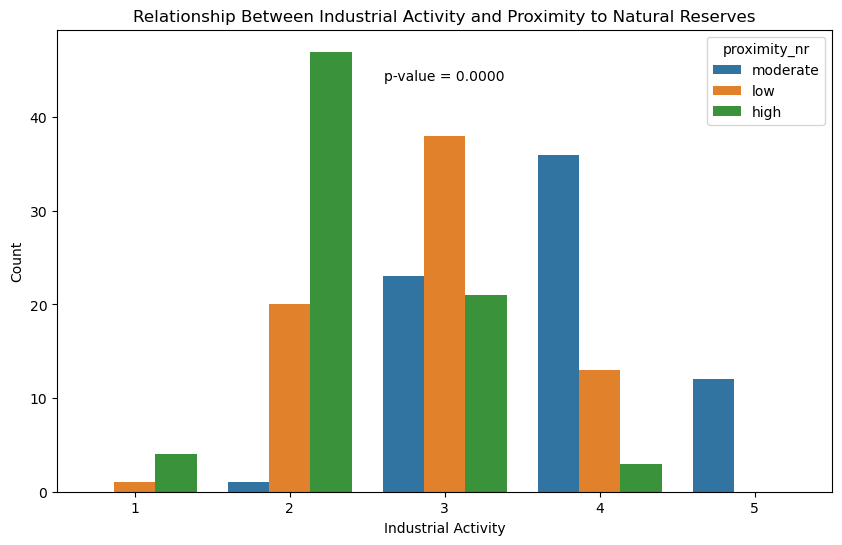

In [15]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='industrial', hue='proximity_nr')
plt.title('Relationship Between Industrial Activity and Proximity to Natural Reserves')
plt.xlabel('Industrial Activity')
plt.ylabel('Count')

# Add the p-value to the plot
plt.text(0.5, 0.9, f'p-value = {p:.4f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [16]:
# Filter data for high and low industrial activity
high_industrial = data[data['industrial'].isin([4, 5])]
low_industrial = data[data['industrial'].isin([1, 2])]

# Calculate the mean PM10 levels for high and low industrial activity regions
mean_pm10_high_industrial = high_industrial['PM10'].mean()
mean_pm10_low_industrial = low_industrial['PM10'].mean()

print(f"Mean PM10 levels for regions with high industrial activity: {mean_pm10_high_industrial:.2f}")
print(f"Mean PM10 levels for regions with low industrial activity: {mean_pm10_low_industrial:.2f}")


Mean PM10 levels for regions with high industrial activity: 25.22
Mean PM10 levels for regions with low industrial activity: 9.23


In [17]:
from scipy.stats import ttest_ind

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(high_industrial['PM10'], low_industrial['PM10'], alternative='greater')

# Define the significance level (alpha)
alpha = 0.05

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: Mean PM10 levels in high industrial activity regions are greater than in low industrial activity regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that mean PM10 levels in high industrial activity regions are greater than in low industrial activity regions.")


T-statistic: 11.48
P-value: 0.0000
Reject the null hypothesis: Mean PM10 levels in high industrial activity regions are greater than in low industrial activity regions.


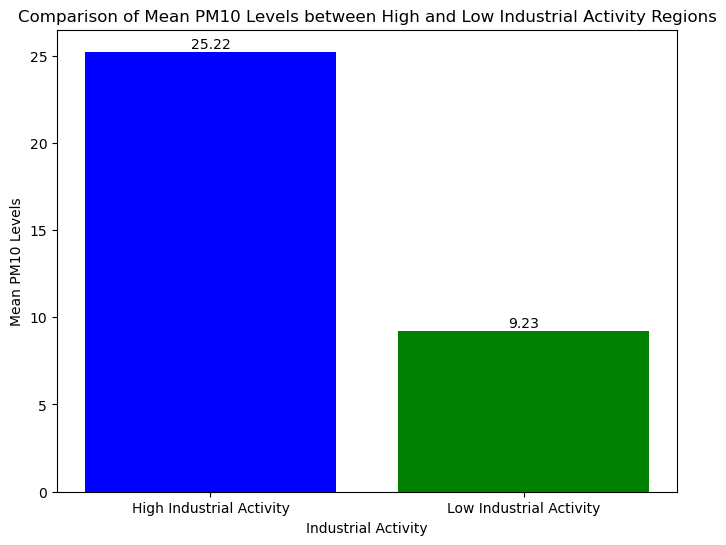

In [18]:
import matplotlib.pyplot as plt

# Define the categories and corresponding mean PM10 values
categories = ['High Industrial Activity', 'Low Industrial Activity']
mean_pm10_values = [mean_pm10_high_industrial, mean_pm10_low_industrial]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, mean_pm10_values, color=['blue', 'green'])
plt.xlabel('Industrial Activity')
plt.ylabel('Mean PM10 Levels')
plt.title('Comparison of Mean PM10 Levels between High and Low Industrial Activity Regions')

# Add data labels to the bars
for i, value in enumerate(mean_pm10_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


In [20]:
# Filter data for high and low traffic density
high_traffic = data[data['traffic'].isin([4, 5])]
low_traffic = data[data['traffic'].isin([1, 2])]

# Extract the PM2.5 data for each group
pm25_high_traffic = high_traffic['PM2.5']
pm25_low_traffic = low_traffic['PM2.5']
from scipy import stats

# Calculate the confidence interval
confidence = 0.88  # 88% confidence level
alpha = 1 - confidence

# Calculate the difference in means
mean_diff = pm25_high_traffic.mean() - pm25_low_traffic.mean()

# Calculate the standard error of the difference
std_error = ((pm25_high_traffic.var() / len(pm25_high_traffic)) + (pm25_low_traffic.var() / len(pm25_low_traffic)))**0.5

# Calculate the margin of error
margin_error = stats.t.ppf(1 - alpha / 2, min(len(pm25_high_traffic), len(pm25_low_traffic))) * std_error

# Calculate the lower and upper bounds of the confidence interval
confidence_interval = (mean_diff - margin_error, mean_diff + margin_error)

print(f"88% Confidence Interval for the Difference in Mean PM2.5 Levels: {confidence_interval}")


88% Confidence Interval for the Difference in Mean PM2.5 Levels: (5.857815278019681, 7.354950679427128)


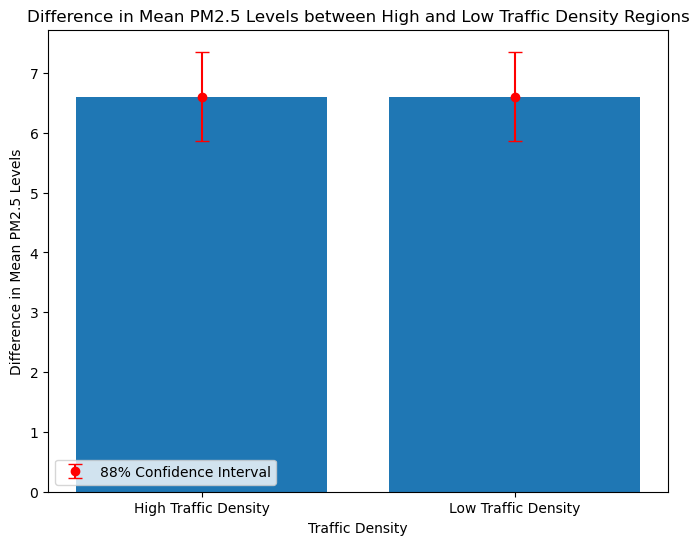

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(['High Traffic Density', 'Low Traffic Density'], [mean_diff, mean_diff])
plt.errorbar(['High Traffic Density', 'Low Traffic Density'], [mean_diff, mean_diff], yerr=margin_error, fmt='ro', capsize=5, label='88% Confidence Interval')
plt.xlabel('Traffic Density')
plt.ylabel('Difference in Mean PM2.5 Levels')
plt.title('Difference in Mean PM2.5 Levels between High and Low Traffic Density Regions')
plt.legend()
plt.show()


In [24]:
# Filter data for inland regions
inland_regions = data[data['distance_to_coast'] == 'inland']
# Calculate the mean population for each state
mean_population_by_state = inland_regions.groupby('state')['population'].mean()
print(mean_population_by_state)

state
NSW    116433.000000
QLD     94178.166667
SA     106633.000000
VIC    118545.833333
WA     118999.666667
Name: population, dtype: float64


In [26]:
from scipy.stats import f_oneway

# Get the population data for each state
populations_by_state = [inland_regions[inland_regions['state'] == state]['population'] for state in mean_population_by_state.index]

# Perform the one-way ANOVA
f_statistic, p_value = f_oneway(*populations_by_state)

# Define the significance level (alpha)
alpha = 0.05

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean population among states.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean population among states.")


F-statistic: 64.72
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in mean population among states.


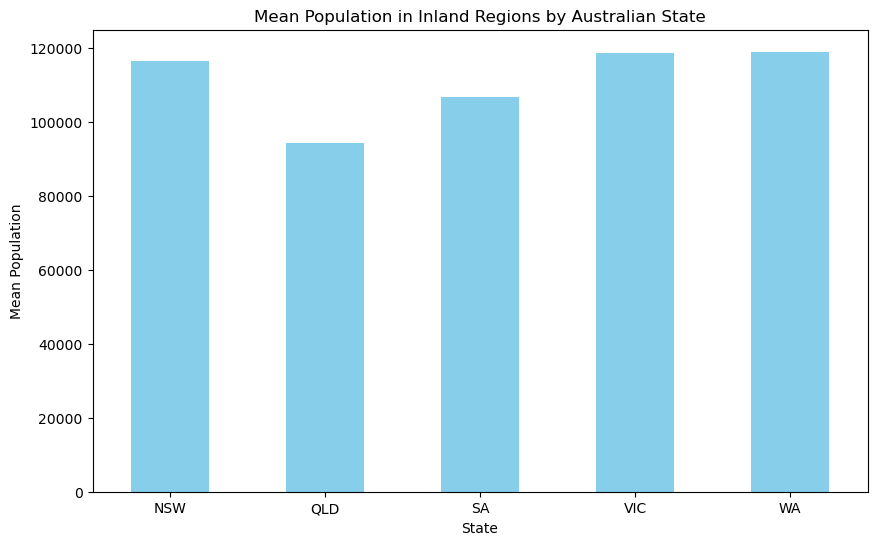

In [27]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_population_by_state.plot(kind='bar', color='skyblue')
plt.title('Mean Population in Inland Regions by Australian State')
plt.xlabel('State')
plt.ylabel('Mean Population')
plt.xticks(rotation=0)
plt.show()


In [28]:
# Filter data for high traffic density and moderate proximity to natural reserves
high_traffic_and_proximity = data[(data['traffic'].isin([4, 5])) & (data['proximity_nr'] == 'moderate')]

# Extract relevant columns
aqi = high_traffic_and_proximity['AQI']
pm25 = high_traffic_and_proximity['PM2.5']

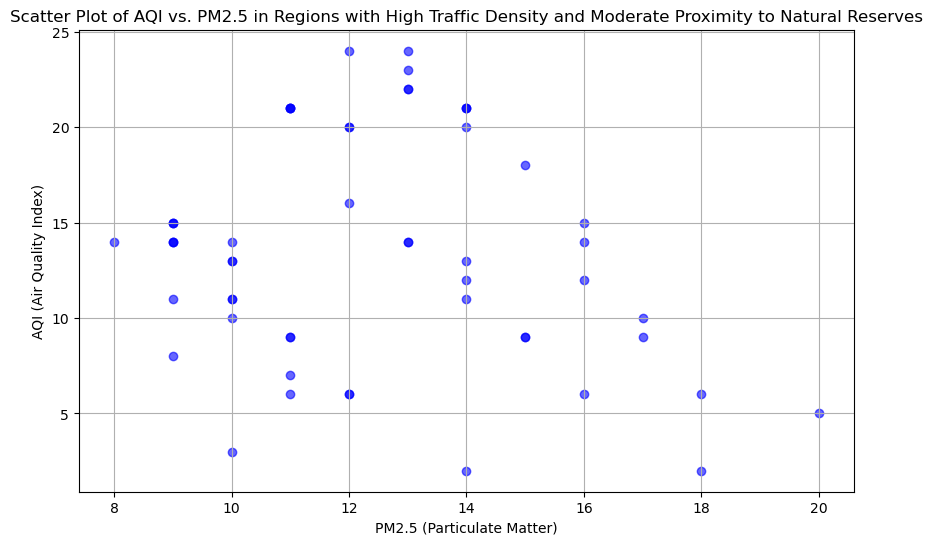

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pm25, aqi, c='b', alpha=0.6)
plt.title('Scatter Plot of AQI vs. PM2.5 in Regions with High Traffic Density and Moderate Proximity to Natural Reserves')
plt.xlabel('PM2.5 (Particulate Matter)')
plt.ylabel('AQI (Air Quality Index)')
plt.grid(True)
plt.show()


In [30]:
import numpy as np
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(pm25, aqi)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")


Slope: -0.3850
Intercept: 18.3229
R-squared: 0.0320
P-value: 0.1868


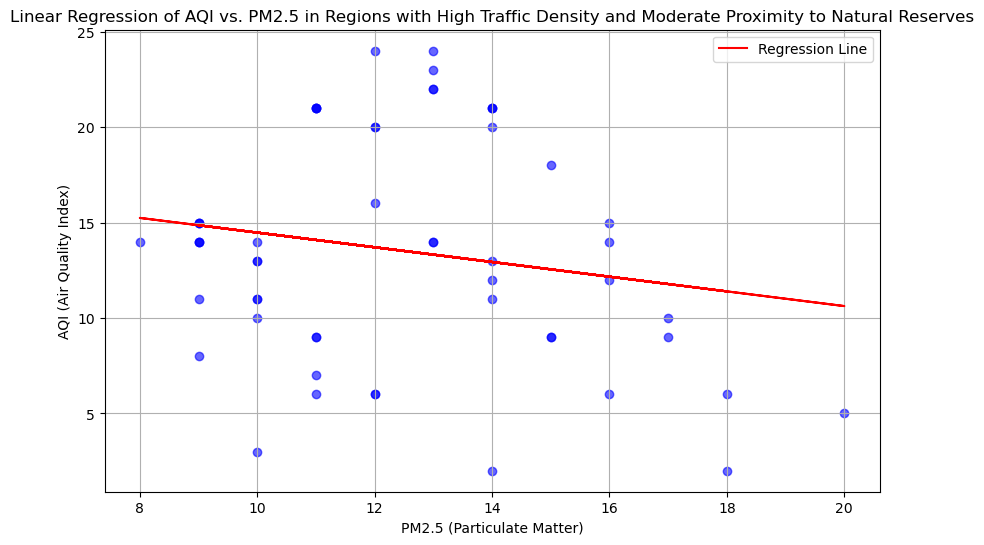

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(pm25, aqi, c='b', alpha=0.6)
plt.plot(pm25, intercept + slope * pm25, 'r', label='Regression Line')
plt.title('Linear Regression of AQI vs. PM2.5 in Regions with High Traffic Density and Moderate Proximity to Natural Reserves')
plt.xlabel('PM2.5 (Particulate Matter)')
plt.ylabel('AQI (Air Quality Index)')
plt.legend()
plt.grid(True)
plt.show()


In [33]:

# Extract relevant columns
humidity = data['humidity']
aqi = data['AQI']

In [34]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(humidity, aqi)

# Define the Humidity value for which you want to estimate AQI
humidity_value = 73

# Calculate the predicted AQI value
predicted_aqi = intercept + slope * humidity_value

# Print the regression equation
print(f"Regression Equation: AQI = {intercept:.4f} + {slope:.4f} * Humidity")

# Print the predicted AQI value
print(f"Predicted AQI for Humidity = {humidity_value}: {predicted_aqi:.4f}")


Regression Equation: AQI = 125.9768 + -1.2250 * Humidity
Predicted AQI for Humidity = 73: 36.5500


In [35]:
# Define the desired confidence level (e.g., 95% for a two-tailed interval)
confidence_level = 0.95

# Calculate the degrees of freedom
n = len(humidity)
degrees_of_freedom = n - 2  # Since we have two parameters (intercept and slope)

# Calculate the t-value for the desired confidence level
from scipy.stats import t

t_value = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Calculate the standard error of the estimate
standard_error_estimate = std_err * (1 / n + (humidity_value - humidity.mean())**2 / ((n - 1) * (humidity.std()**2)))**0.5

# Calculate the margin of error
margin_error = t_value * standard_error_estimate

# Calculate the lower and upper bounds of the prediction interval
lower_bound = predicted_aqi - margin_error
upper_bound = predicted_aqi + margin_error

# Print the prediction interval
print(f"{int(confidence_level * 100)}% Prediction Interval for AQI when Humidity = {humidity_value}: ({lower_bound:.4f}, {upper_bound:.4f})")


95% Prediction Interval for AQI when Humidity = 73: (36.5373, 36.5627)


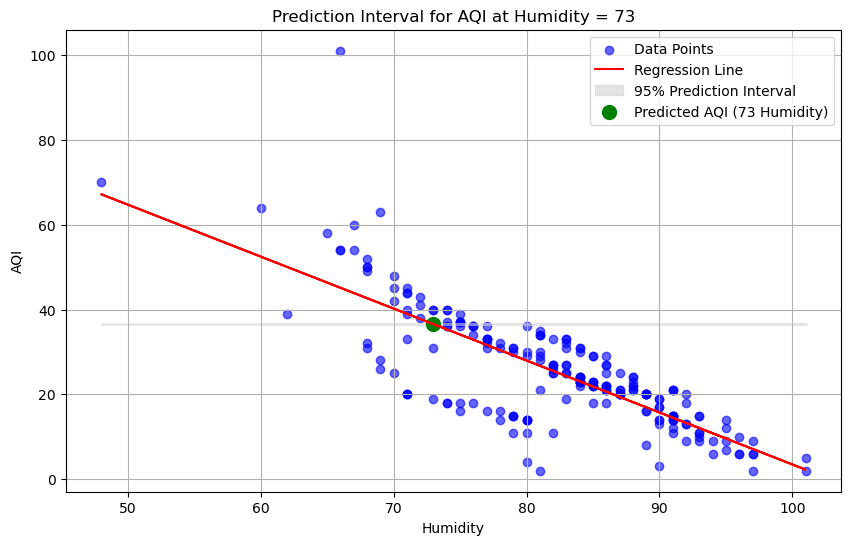

In [36]:
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(humidity, aqi, c='b', alpha=0.6, label='Data Points')

# Regression line
plt.plot(humidity, intercept + slope * humidity, 'r', label='Regression Line')

# Shaded prediction interval
plt.fill_between(humidity, lower_bound, upper_bound, color='lightgray', alpha=0.6, label=f'{int(confidence_level * 100)}% Prediction Interval')

# Plot the point for the specific Humidity value
plt.scatter(humidity_value, predicted_aqi, c='g', marker='o', s=100, label=f'Predicted AQI ({humidity_value} Humidity)')

plt.title(f'Prediction Interval for AQI at Humidity = {humidity_value}')
plt.xlabel('Humidity')
plt.ylabel('AQI')
plt.grid(True)
plt.legend()
plt.show()
